$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\piv}{\mathbf{\pi}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\Sv}{\mathbf{S}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Norm}{\mathcal{N}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
$

# Hierarchical Clustering

Hierarchical clustering is often used to construct dendrograms.  We will see an example below.  

The methods are straightforward.  The similarity between pairs of samples is usually related to the Euclidean distance between them.  In *agglomerative* clustering, initially each sample is in a unique cluster.  Then, the most similar two clusters are merged.  This continues until a single cluster results that contains all samples.  The distance between two clusters, $C_i$ and $C_j$, can be determined by the *single-link* method
$$
d(C_i,C_j) = \min_{\xv\in C_i, \yv\in C_j} d(\xv,\yv)
$$
or *complete-link* method
$$
d(C_i,C_j) = \max_{\xv\in C_i, \yv\in C_j} d(\xv,\yv)
$$
where $d(\xv,\yv)$ is the Euclidean distance between $\xv$ and $\yv$.

In *divisive* clustering, all samples are initially in one cluster, which is successively split until all samples are in unique clusters.  We will use *agglomerative* clustering, as it often results in more compact dendrograms.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's represent clusters as a list of sample matrices, each matrix containing samples from one cluster.  Initially, all samples are in their own clusters.  Let's use the Old Faithful data to develop our implementation.

In [2]:
!wget http://www.cs.colostate.edu/~anderson/cs480/notebooks/oldfaithful.csv

--2017-04-21 08:01:41--  http://www.cs.colostate.edu/~anderson/cs480/notebooks/oldfaithful.csv
Resolving www.cs.colostate.edu (www.cs.colostate.edu)... 129.82.45.114
Connecting to www.cs.colostate.edu (www.cs.colostate.edu)|129.82.45.114|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3808 (3.7K) [text/csv]
Saving to: ‘oldfaithful.csv’

oldfaithful.csv     100%[===================>]   3.72K  --.-KB/s    in 0s      

2017-04-21 08:01:41 (252 MB/s) - ‘oldfaithful.csv’ saved [3808/3808]



In [3]:
data = np.loadtxt('oldfaithful.csv')

In [4]:
data.shape

(272, 2)

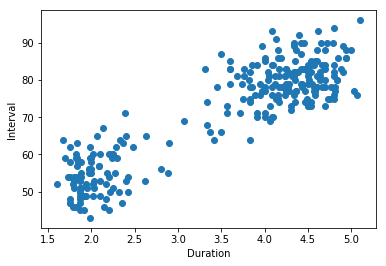

In [5]:
plt.scatter(data[:,0],data[:,1]);
plt.xlabel('Duration');
plt.ylabel('Interval');

In [6]:
clusters = [d for d in data]
clusters[:5]

[array([  3.6,  79. ]),
 array([  1.8,  54. ]),
 array([  3.333,  74.   ]),
 array([  2.283,  62.   ]),
 array([  4.533,  85.   ])]

Now we need the *complete-linkage* cluster distance function.

In [7]:
C1 = [np.array([[1,2]]), np.array([[2,3]])]
C2 = [np.array([[2,2]]), np.array([[6,7]])]
C1,C2
               

([array([[1, 2]]), array([[2, 3]])], [array([[2, 2]]), array([[6, 7]])])

In [8]:
allC1 = np.vstack((C1))
allC2 = np.vstack((C2))
allC1,allC2

(array([[1, 2],
        [2, 3]]), array([[2, 2],
        [6, 7]]))

In [9]:
allC1[:,np.newaxis,:] - allC2

array([[[-1,  0],
        [-5, -5]],

       [[ 0,  1],
        [-4, -4]]])

In [10]:
np.sum((allC1[:,np.newaxis,:] - allC2)**2,axis=2)

array([[ 1, 50],
       [ 1, 32]])

In [11]:
np.max(np.sum((allC1[:,np.newaxis,:] - allC2)**2,axis=2))

50

So, the maximum square distance between $C_1$ and $C_2$ is 50.

In [12]:
def clusterDistance(Ci,Cj):
    allCi = np.vstack((Ci))
    allCj = np.vstack((Cj))
    return np.max(np.sum((allCi[:,np.newaxis,:] - allCj)**2, axis=2))

In [13]:
clusterDistance(C1,C2)

50

All that is left is a way to identify to two clusters with the minimum distance.

In [14]:
C3 = [np.array([[6,4]]), np.array([[8,9]])]

In [15]:
clusters = [C1, C2, C3]
clusters

[[array([[1, 2]]), array([[2, 3]])],
 [array([[2, 2]]), array([[6, 7]])],
 [array([[6, 4]]), array([[8, 9]])]]

In [16]:
for i in range(len(clusters)-1):
    for j in range(i+1,len(clusters)):
        print(i,j)

0 1
0 2
1 2


In [17]:
dists = []
for i in range(len(clusters)-1):
    for j in range(i+1,len(clusters)):
        dists.append([i,j,clusterDistance(clusters[i],clusters[j])])
dists

[[0, 1, 50], [0, 2, 98], [1, 2, 85]]

or

In [18]:
[[i,j,clusterDistance(clusters[i],clusters[j])] for i in range(len(clusters)-1) for j in range(i+1,len(clusters))]

[[0, 1, 50], [0, 2, 98], [1, 2, 85]]

In [71]:
def clusterDistance(Ci,Cj):
    '''Ci and Cj are two clusters, each being a dict with 'X' and 'label' keys'''
    return np.mean(np.sum((Ci['X'][:,np.newaxis,:] - Cj['X'])**2, axis=2))
    # return np.min(np.sum((Ci['X'][:,np.newaxis,:] - Cj['X'])**2, axis=2))
    # return np.max(np.sum((Ci['X'][:,np.newaxis,:] - Cj['X'])**2, axis=2))

So, clusters at indices 0 and 1 are closest.  We can merge these two using `np.vstack`.  Now we are ready to write the function.

In [72]:
def mergeClusters(Ci,Cj, k):
    return {'X': np.vstack((Ci['X'], Cj['X'])),
            'label': k}

Now for a simple, but very inefficient, implementation of agglomerative clustering.

In [73]:
def agglomerative(X,clusterDistanceF, nClusters):
    labels = np.zeros((X.shape[0]))
    # clusters is list of pairs of sample and label
    clusters = [ {'X':X[i:i+1,:], 'label':i} for i in range(X.shape[0]) ]
    k = X.shape[0] - 1
    while len(clusters) > nClusters:
        dists = np.array( [[i,j,clusterDistance(clusters[i],clusters[j])] for i in range(len(clusters)-1) for j in range(i+1,len(clusters))] )
        whichClosest = np.argmin(dists[:,-1])
        closest = dists[whichClosest,:2]
        i,j = closest.astype(int)
        # Merge them
        k += 1
        clusters[i] = {'X': np.vstack((clusters[i]['X'],clusters[j]['X'])),
                       'label': k}
        clusters.pop(j)
        print(len(clusters), end=' ')
    return clusters

In [74]:
data.shape

(272, 2)

In [75]:
clusters = agglomerative(data,clusterDistance, 2)

271 270 269 268 267 266 265 264 263 262 261 260 259 258 257 256 255 254 253 252 251 250 249 248 247 246 245 244 243 242 241 240 239 238 237 236 235 234 233 232 231 230 229 228 227 226 225 224 223 222 221 220 219 218 217 216 215 214 213 212 211 210 209 208 207 206 205 204 203 202 201 200 199 198 197 196 195 194 193 192 191 190 189 188 187 186 185 184 183 182 181 180 179 178 177 176 175 174 173 172 171 170 169 168 167 166 165 164 163 162 161 160 159 158 157 156 155 154 153 152 151 150 149 148 147 146 145 144 143 142 141 140 139 138 137 136 135 134 133 132 131 130 129 128 127 126 125 124 123 122 121 120 119 118 117 116 115 114 113 112 111 110 109 108 107 106 105 104 103 102 101 100 99 98 97 96 95 94 93 92 91 90 89 88 87 86 85 84 83 82 81 80 79 78 77 76 75 74 73 72 71 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50 49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10 9 8 7 6 5 4 3 2 

In [76]:
clusters

[{'X': array([[  3.6  ,  79.   ],
         [  3.733,  79.   ],
         [  3.95 ,  79.   ],
         [  4.25 ,  79.   ],
         [  4.283,  79.   ],
         [  4.117,  79.   ],
         [  4.433,  79.   ],
         [  4.417,  79.   ],
         [  4.5  ,  79.   ],
         [  4.55 ,  79.   ],
         [  4.2  ,  78.   ],
         [  4.167,  78.   ],
         [  4.267,  78.   ],
         [  4.   ,  78.   ],
         [  4.083,  78.   ],
         [  3.85 ,  78.   ],
         [  3.833,  78.   ],
         [  4.7  ,  78.   ],
         [  4.667,  78.   ],
         [  4.567,  78.   ],
         [  4.6  ,  78.   ],
         [  4.817,  78.   ],
         [  4.767,  78.   ],
         [  4.433,  78.   ],
         [  3.45 ,  78.   ],
         [  4.083,  76.   ],
         [  4.15 ,  76.   ],
         [  4.333,  76.   ],
         [  4.233,  76.   ],
         [  3.883,  76.   ],
         [  3.95 ,  76.   ],
         [  5.067,  76.   ],
         [  4.583,  76.   ],
         [  4.8  ,  76.   ],
         

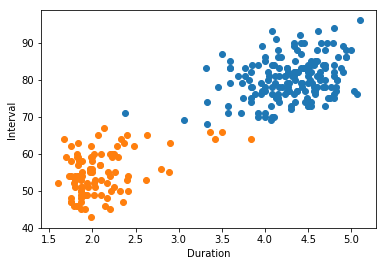

In [77]:
for i in range(len(clusters)):
    cluster = clusters[i]['X']
    plt.scatter(cluster[:,0], cluster[:,1])
plt.xlabel('Duration');
plt.ylabel('Interval');

How might we make this more efficient?

Maybe if we compute the pairwise squared distance between data points once!  Then clusters are defined by indices into this distance matrix.

In [79]:
dataDists = np.sum((data[:,np.newaxis,:] - data)**2, axis=2)
dataDists.shape

(272, 272)

In [80]:
def clusterDistance(Ci, Cj, dataDists):
    '''Ci and Cj are two clusters, each being a dict with 'X' and 'label' keys'''
    return np.mean( np.array([dataDists[i,j] for i in Ci['X'] for j in Cj['X']]) )
    # return np.min(np.sum((Ci['X'][:,np.newaxis,:] - Cj['X'])**2, axis=2))
    # return np.max(np.sum((Ci['X'][:,np.newaxis,:] - Cj['X'])**2, axis=2))

In [81]:
def agglomerative(X,clusterDistanceF, nClusters):
    dataDists = np.sum((X[:,np.newaxis,:] - X)**2, axis=2)
    labels = np.zeros((X.shape[0]))
    # clusters is list of pairs of sample and label
    clusters = [ {'X':[i], 'label':i} for i in range(X.shape[0]) ]
    k = X.shape[0] - 1
    while len(clusters) > nClusters:
        dists = np.array( [[i,j,clusterDistance(clusters[i],clusters[j], dataDists)] for i in range(len(clusters)-1) for j in range(i+1,len(clusters))] )
        whichClosest = np.argmin(dists[:,-1])
        closest = dists[whichClosest,:2]
        i,j = closest.astype(int)
        # Merge them
        k += 1
        clusters[i] = {'X': clusters[i]['X'] + clusters[j]['X'],
                       'label': k}
        clusters.pop(j)
        print(len(clusters), end=' ')
    return clusters

In [82]:
clusters = agglomerative(data,clusterDistance, 2)

271 270 269 268 267 266 265 264 263 262 261 260 259 258 257 256 255 254 253 252 251 250 249 248 247 246 245 244 243 242 241 240 239 238 237 236 235 234 233 232 231 230 229 228 227 226 225 224 223 222 221 220 219 218 217 216 215 214 213 212 211 210 209 208 207 206 205 204 203 202 201 200 199 198 197 196 195 194 193 192 191 190 189 188 187 186 185 184 183 182 181 180 179 178 177 176 175 174 173 172 171 170 169 168 167 166 165 164 163 162 161 160 159 158 157 156 155 154 153 152 151 150 149 148 147 146 145 144 143 142 141 140 139 138 137 136 135 134 133 132 131 130 129 128 127 126 125 124 123 122 121 120 119 118 117 116 115 114 113 112 111 110 109 108 107 106 105 104 103 102 101 100 99 98 97 96 95 94 93 92 91 90 89 88 87 86 85 84 83 82 81 80 79 78 77 76 75 74 73 72 71 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50 49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10 9 8 7 6 5 4 3 2 

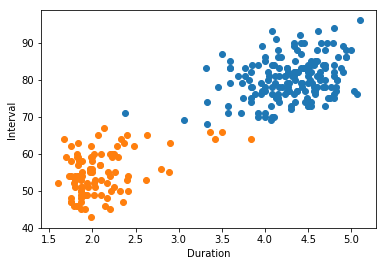

In [85]:
for i in range(len(clusters)):
    cluster = clusters[i]['X']
    coords = np.array([data[c] for c in cluster])
    plt.scatter(coords[:,0], coords[:,1])
plt.xlabel('Duration');
plt.ylabel('Interval');

What else could you do to speed this up?

Let's try another data set, this time from [Finland](http://cs.joensuu.fi/sipu/datasets/).

In [67]:
data2 = np.loadtxt('userslocations.csv')

In [68]:
data2.shape

(13467, 2)

In [ ]:
clusters =  agglomerative(data2,clusterDistance, 4)
plt.figure(figsize=(20,8))
for i in range(len(clusters)):
    cluster = clusters[i]['X']
    coords = np.array([data[c] for c in cluster])
    plt.scatter(coords[:,0], coords[:,1])
plt.xlabel('Interval (minutes)')
plt.ylabel('Duration (minutes)')
plt.subplot(1,3,2);